# The SIR epidemic model

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

S(t) are those susceptible but not yet infected with the disease;
I(t) is the number of infectious individuals;
R(t) are those individuals who have recovered from the disease and now have immunity to it.
The SIR model describes the change in the population of each of these compartments in terms of two parameters, β and γ. β describes the effective contact rate of the disease: an infected individual comes into contact with βN other individuals per unit time (of which the fraction that are susceptible to contracting the disease is S/N). γ is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model were first derived by Kermack and McKendrick 

N is the total number of population
dS/dt =  -beta * S * I / N
dI/dt = beta * S * I/N - gamma * I
dR/dt = gamma * I



Case 1 :
Effective contact rate beta  is transmission rate * contact rate.
For an example, 10% transmission rate and 5 contacts a day is 0.1 * 5 = 0.50
Rate of recovery gamma is 1 / 16 no of days person is contagious which is 0.0625
R0 = beta / gamma
R0 = 0.50/ 0.0625
R0  = 8 which is very large.
When R0 is less than 1 then the curve flattens.


Let's do different plotting for Telagana . with different contract and recovery rate

In [32]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [33]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 500)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [34]:
statedf = pd.read_excel('Covid_Data_11.Jul.2020C.xlsx', 'KA')

In [35]:
statedf.head()

,Row Labels,Confirmed,Deceased,Recovered
0,14-Mar,6,1,0
1,15-Mar,0,0,0
2,16-Mar,1,0,0
3,17-Mar,2,0,0
4,18-Mar,5,0,0


In [36]:
statedf['Removed'] = statedf['Deceased'] + statedf['Recovered']
statedf.drop(['Deceased', 'Recovered'], axis=1, inplace=True)

In [37]:
Inf = np.array(statedf['Confirmed'])
len(Inf)

120

In [38]:
Rec = np.array(statedf['Removed'])
len(Rec)

120

Plotting Actual data

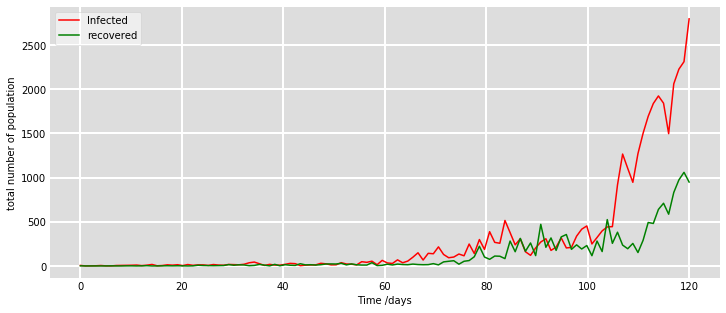

In [39]:
t = np.linspace(0, 120, 120)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, Inf, 'r', label='Infected')
ax.plot(t, Rec, 'g', label='recovered')
#ax.plot(t, D, 'k', label='deceased')

ax.set_xlabel('Time /days')
ax.set_ylabel('total number of population')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Loading the coronavirus india data

In [40]:
# The SIR model differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I
    # Change in I population over time
    dIdt = beta * S * I  - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt 

In [41]:
Infected =[]
Recovered = []
daily_totalInf = 0
daily_totalRec = 0

for valinf in Inf:
    daily_totalInf = valinf + daily_totalInf
    Infected.append(daily_totalInf)
for valrec in Rec:
    daily_totalRec = valrec + daily_totalRec 
    Recovered.append(daily_totalRec)

In [42]:
Recovered = np.array(Recovered)
Infected = np.array(Infected)

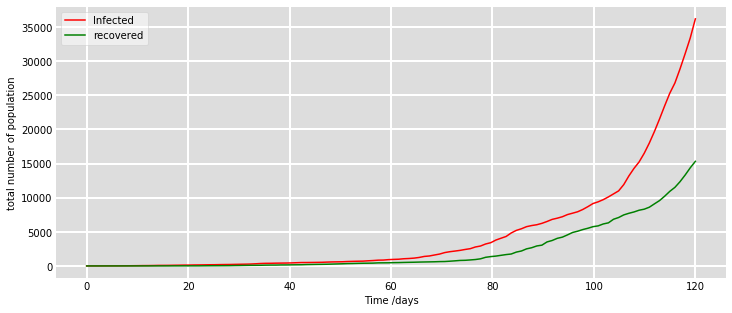

In [43]:
t = np.linspace(0, 120, 120)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, Infected, 'r', label='Infected')
ax.plot(t, Recovered, 'g', label='recovered')
#ax.plot(t, D, 'k', label='deceased')

ax.set_xlabel('Time /days')
ax.set_ylabel('total number of population')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [44]:
len(Recovered)

120

In [45]:
len(Infected)

120

In [46]:
#Bangalore calculation- Taken 49.88% of the total cases based on the actual data till date

In [47]:
population_affected_in_city = 0.4988
Infected_City = Infected*population_affected_in_city
Recovered_City = Recovered*population_affected_in_city
starting_day_for_0 = 60
Recovered_act_city = Recovered*population_affected_in_city
Infected_act_city = Infected*population_affected_in_city
Recovered_act_mse = Recovered[starting_day_for_0:]*population_affected_in_city
Infected_act_mse = Infected[starting_day_for_0:]*population_affected_in_city

In [48]:
#considering 5% of population. Total population for Chennai City is 10971108
total_pop = 12327000 * 0.03
Susceptible_City = total_pop - Infected_City - Recovered_City
len(Susceptible_City )

120

In [49]:
# Everyone not infected or recovered is susceptible
s= []
inf = []
r = []
dt = 1
beta = []
gamma =[]

count =0

for i in np.arange(0,119,1):
    beta.append((Susceptible_City[i]-Susceptible_City[i+1])/(Susceptible_City[i]*Infected_City[i]*dt))
    
for i in np.arange(0,119,1):
    gamma.append((Recovered_City[i+1]-Recovered_City[i])/(Infected_City[i]*dt))

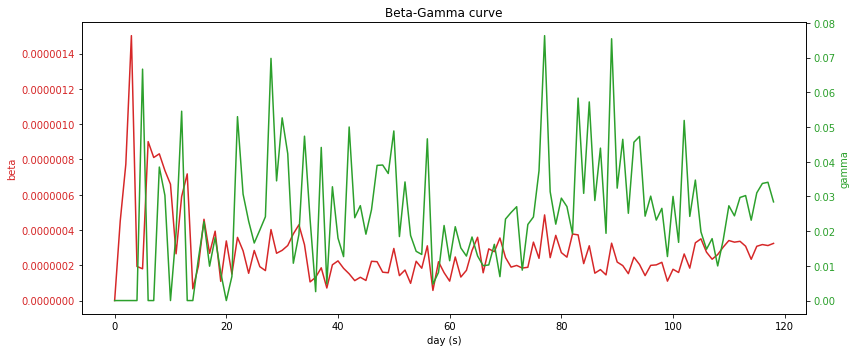

In [50]:
t = np.arange(0, 119, 1)
data1 = beta
data2 = gamma

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('day (s)')
ax1.set_ylabel('beta', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('gamma', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_title('Beta-Gamma curve')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [51]:
pd.DataFrame(beta[20:]).describe()

,0
count,9.900000e+01
mean,2.368277e-07
std,8.675481e-08
min,5.749906e-08
25%,1.705584e-07
50%,2.227951e-07
75%,3.092589e-07
max,4.856711e-07


In [52]:
pd.DataFrame(gamma[20:]).describe()

,0
count,99.000000
mean,0.027425
std,0.015361
min,0.000000
25%,0.017700
50%,0.024308
75%,0.034127
max,0.076318


In [53]:
beta_25 = pd.DataFrame(beta[20:]).describe().T['25%'][0]
beta_75 = pd.DataFrame(beta[20:]).describe().T['75%'][0]
gamma_25 = pd.DataFrame(gamma[20:]).describe().T['25%'][0]
gamma_75 = pd.DataFrame(gamma[20:]).describe().T['75%'][0]

In [54]:
dfpredicted = pd.DataFrame(columns = ['S','I','R','beta','gamma'])
total_days = 600
days = range(0, total_days)
sus = []
inf = []
rec = []

for k in np.linspace(beta_25, beta_75, 30):
    for z in np.linspace(gamma_25, gamma_75, 30):
        ret = odeint(deriv,
             [Susceptible_City[starting_day_for_0], Infected_City[starting_day_for_0], Recovered_City[starting_day_for_0]],
             days,
             args=(total_pop, k, z))

        dftemp = pd.DataFrame(ret,columns = ['S','I','R'])
        dftemp['beta'] = k
        dftemp['gamma'] = z
        dfpredicted = pd.concat([dfpredicted, dftemp])

In [55]:
from sklearn.metrics import mean_squared_error
mserec=[]
mseinf = [] 
betanew = []
gammanew = []
count_recs = len(Infected_act_mse)
for t in np.arange(0,dfpredicted.shape[0],total_days):
    Recovered_pred = np.array(dfpredicted.iloc[t:t+total_days]['R'][0:count_recs])
    Infected_pred = np.array(dfpredicted.iloc[t:t+total_days]['I'][0:count_recs])
    betanew.append(dfpredicted.iloc[t:t+total_days]['beta'][0:1].to_numpy()[0])
    gammanew.append(dfpredicted.iloc[t:t+total_days]['gamma'][0:1].to_numpy()[0])
    mserec.append(mean_squared_error(Recovered_act_mse, Recovered_pred))
    mseinf.append(mean_squared_error(Infected_act_mse, Infected_pred))

In [56]:
msedf = pd.DataFrame(columns = ['MSEI','MSER','beta','gamma'])
msedf['MSEI'] =mseinf
msedf['MSER'] =mserec
msedf['beta'] = betanew
msedf['gamma'] =gammanew

In [57]:
msedf.describe()

,MSEI,MSER,beta,gamma
count,9.000000e+02,9.000000e+02,9.000000e+02,900.000000
mean,5.097609e+07,3.447424e+06,2.399086e-07,0.025913
std,9.640108e+07,4.720911e+06,4.142006e-08,0.004906
min,3.554509e+05,4.826543e+04,1.705584e-07,0.017700
25%,4.242963e+06,5.809255e+05,2.040378e-07,0.021665
50%,1.348499e+07,1.684655e+06,2.399086e-07,0.025913
75%,4.142316e+07,3.178848e+06,2.757795e-07,0.030162
max,6.811452e+08,2.043608e+07,3.092589e-07,0.034127


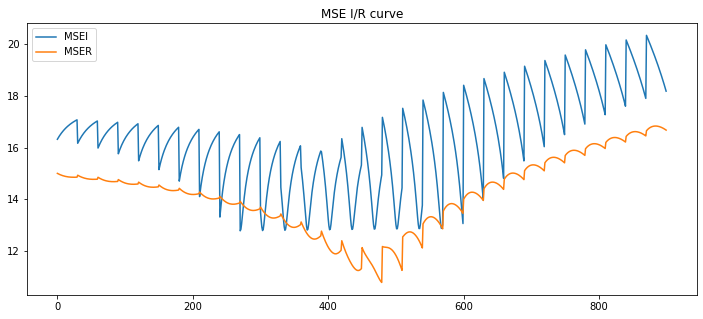

In [58]:
np.log(msedf[['MSEI', 'MSER']]).plot(title = 'MSE I/R curve')

In [59]:
msedf.iloc[400:600].sort_values(['MSEI', 'MSER']).head(10)

,MSEI,MSER,beta,gamma
402,370651.196268,173665.132920,2.327345e-07,0.024497
435,374903.201649,95652.321406,2.375172e-07,0.026196
468,379311.898763,81198.064623,2.423000e-07,0.027896
403,380290.626765,167498.998705,2.327345e-07,0.025064
436,381867.482404,91827.026237,2.375172e-07,0.026763
469,383706.816263,77178.271908,2.423000e-07,0.028462
501,383866.192959,130760.279255,2.470828e-07,0.029595
502,385798.302478,123997.270829,2.470828e-07,0.030162
535,388132.090243,232714.134737,2.518656e-07,0.031861
534,388555.547624,244781.475385,2.518656e-07,0.031294


(340, 3)


Text(0.5, 1.0, 'Bangalore - 3%')

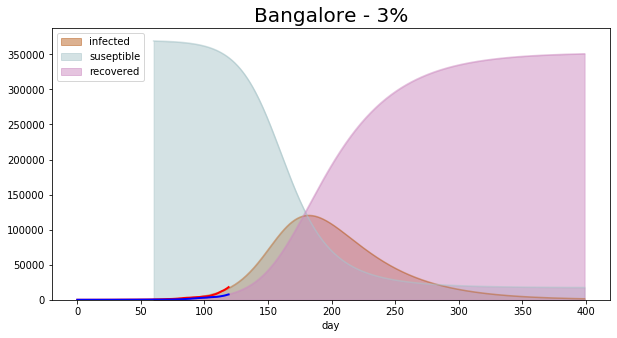

In [60]:
days = range(starting_day_for_0,400)

ret = odeint(deriv,
             [Susceptible_City[starting_day_for_0], Infected_City[starting_day_for_0], Recovered_City[starting_day_for_0]],
             days,
             args=(total_pop, 2.423000e-07, 0.027896))
print(ret.shape)
S, I, R = ret.T
dfpresent = pd.DataFrame()
# Build a dataframe because why not
dfpresent1 = pd.DataFrame()
#days = days + 40
dfpresent1 = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'recovered': R,
    'day': days
})

f, (ax1) = plt.subplots(1,figsize=(10,5))
plt.rcParams["figure.figsize"] = [12,5]
dfpresent1.plot(x='day',
        y=['infected', 'suseptible', 'recovered'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',ax =ax1,
        stacked=False)
ax1.plot(pd.DataFrame(Infected_act_city),'r', alpha=1.0, lw=2, label='Infected')
ax1.plot(pd.DataFrame(Recovered_act_city),'b',alpha=1.0, lw=2, label='Recovered')
ax1.set_title('Bangalore - 3%',fontsize = 20)

In [61]:
dfpresent1.loc[dfpresent1['infected'] == dfpresent1.max()['infected']]

,suseptible,infected,recovered,day
122,115725.204066,120312.984665,133771.81127,182


In [62]:
dfpresent1.sort_values('recovered', ascending=False).head(1)

,suseptible,infected,recovered,day
339,17571.588178,1454.004915,350784.406907,399


In [63]:
dfpresent1[dfpresent1['day']==300]

,suseptible,infected,recovered,day
240,20185.106896,14804.614711,334820.278393,300


In [64]:
import datetime
StartDate = datetime.datetime.strptime("20200314", "%Y%m%d")
StartDate + datetime.timedelta(days=np.int(dfpresent1.sort_values('infected', ascending=False).head(1)['day']))

datetime.datetime(2020, 9, 12, 0, 0)

In [65]:
#Load the data for 11th to 17th and check the values as test data

In [66]:
data_test_all = pd.read_csv('Covid_Data_17.Jul.2020.csv')

In [70]:
data_test_ka = data_test_all.pivot_table(values='KA', index='Date', columns='Status', aggfunc='sum').reset_index()
data_test_ka['Date'] = pd.to_datetime(data_test_ka['Date'], errors='coerce')
data_test_ka = (data_test_ka.sort_values('Date').reset_index()).drop('index', axis=1)
data_test_ka['Removed'] = data_test_ka['Deceased'] + data_test_ka['Recovered']
data_test_ka.drop(['Deceased', 'Recovered'], axis=1, inplace=True)
data_test_ka['Infected_Active'] = 0
data_test_ka['Recovered_Active'] = 0
counter = 0
while counter < len(data_test_ka['Removed']):
    data_test_ka.loc[counter, 'Infected_Active'] = data_test_ka.loc[0:counter, 'Confirmed'].sum()*population_affected_in_city
    data_test_ka.loc[counter, 'Recovered_Active'] = data_test_ka.loc[0:counter, 'Removed'].sum()*population_affected_in_city
    counter = counter + 1
data_test_ka.drop(['Confirmed', 'Removed'], axis=1, inplace=True)

In [71]:
data_test_ka[len(Infected_City):len(data_test_ka)]

Status,Date,Infected_Active,Recovered_Active
120,2020-07-12,19374.8884,8030.1812
121,2020-07-13,20740.6028,8484.5880
122,2020-07-14,21985.6076,9097.6132
123,2020-07-15,23569.7964,9677.7176
124,2020-07-16,25649.2936,10359.5772
125,2020-07-17,27491.3620,10929.7056


In [73]:
dfpresent1[(dfpresent1['day']>=len(Infected_City)) & (dfpresent1['day']<len(data_test_ka))]

,suseptible,infected,recovered,day
60,343963.430800,17487.817129,8358.752072,120
61,342468.142330,18481.517836,8860.339835,121
62,340895.244069,19524.425461,9390.330470,122
63,339241.756503,20618.124626,9950.118871,123
64,337504.707484,21764.149074,10541.143442,124
65,335681.148783,22963.966727,11164.884490,125
